In [1]:
df <- read.table('salaries.csv', sep=",", header=T)

In [2]:
print(head(df))

  Exp Salary
1   1  45000
2   2  50000
3   3  60000
4   4 170000
5   5 400000
6   6 280000


# Αναλυση Δεδομένων

In [3]:
# έλεγχος για τιμές που απουσιάζουν με την συνάρτηση is.na()
missing_values <- is.na(df)

# Display the result
print(missing_values)

        Exp Salary
 [1,] FALSE  FALSE
 [2,] FALSE  FALSE
 [3,] FALSE  FALSE
 [4,] FALSE  FALSE
 [5,] FALSE  FALSE
 [6,] FALSE  FALSE
 [7,] FALSE  FALSE
 [8,] FALSE  FALSE
 [9,] FALSE  FALSE
[10,] FALSE  FALSE
[11,] FALSE  FALSE
[12,] FALSE  FALSE
[13,] FALSE   TRUE


In [4]:
# έλεγχος για τιμές που απουσιάζουν με την συνάρτηση is.na() & colSums()
missing_values_count <- colSums(is.na(df))

# Display the result
print(missing_values_count)

   Exp Salary 
     0      1 


In [5]:
df<-na.omit(df)

In [6]:
# έλεγχος για τιμές που απουσιάζουν με την συνάρτηση is.na()
missing_values <- is.na(df)

# Display the result
print(missing_values)

     Exp Salary
1  FALSE  FALSE
2  FALSE  FALSE
3  FALSE  FALSE
4  FALSE  FALSE
5  FALSE  FALSE
6  FALSE  FALSE
7  FALSE  FALSE
8  FALSE  FALSE
9  FALSE  FALSE
10 FALSE  FALSE
11 FALSE  FALSE
12 FALSE  FALSE


In [7]:
# έλεγχος της συσχέτισης των δεδομένων με την συναρτηση cor()
correlation_matrix <- cor(df, use = "complete.obs")

print(correlation_matrix)

             Exp    Salary
Exp    1.0000000 0.9429595
Salary 0.9429595 1.0000000


In [8]:
# εμφάνιση συγκεντρωτικών στατιστικών ανά μεταβλητή με την συνάρτηση summary()
summary_statistics <- summary(df)

print(summary_statistics)

      Exp             Salary       
 Min.   : 1.000   Min.   :  45000  
 1st Qu.: 3.750   1st Qu.: 142500  
 Median : 6.500   Median : 410000  
 Mean   : 6.458   Mean   : 492917  
 3rd Qu.: 9.250   3rd Qu.: 692500  
 Max.   :11.500   Max.   :1300000  


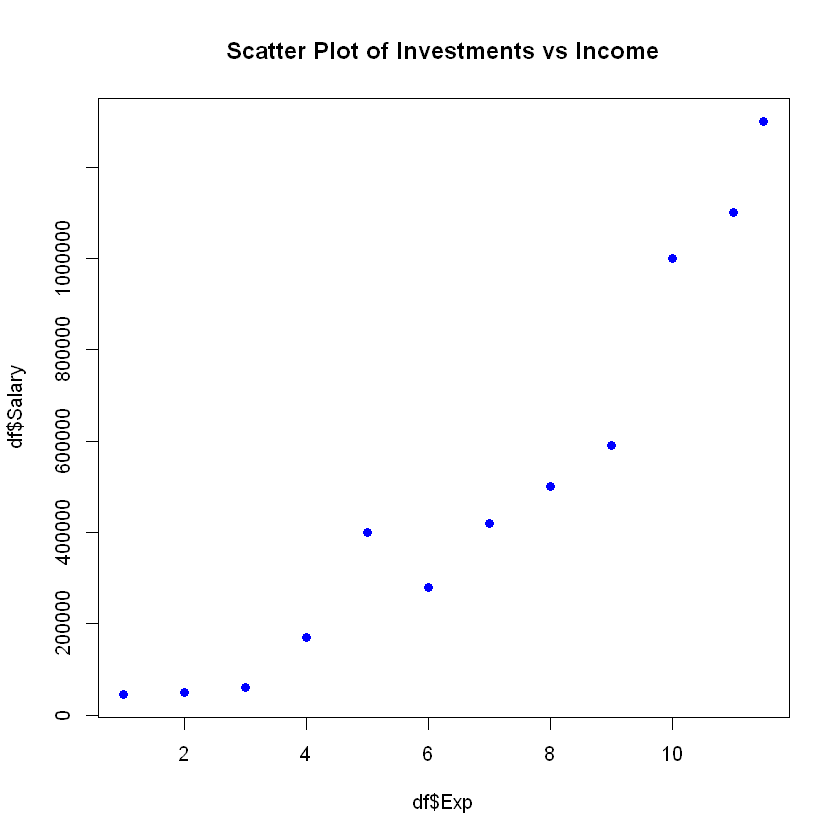

In [9]:
# οπτικοποίηση δεδομένων με scatterplot
plot(df$Exp, df$Salary, 
     main = "Scatter Plot of Investments vs Income", 
     col = "blue", 
     pch = 16)

In [10]:
# εγκατάσταση πακέτου caret σε περίπτωση που δεν είναι ήση εγκατεστημένο στο σύστημα
install.packages("caret")

library(caret)

package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\varvo\AppData\Local\Programs\R\R-4.5.1\library\00LOCK\caret\libs\x64\caret.dll to C:\Users\varvo\AppData\Local\Programs\R\R-4.5.1\library\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\varvo\AppData\Local\Temp\RtmpQHuJLe\downloaded_packages


Loading required package: ggplot2

Loading required package: lattice



In [11]:
# με την εντολή set.seed(77) διασφαλίζεται πως κάθε φορά που εκτελείται αυτό το μπλοκ κώδικα, οι ίδιες εγγραφές καταλήγουν στο Σύνολο Εκπαίδευσης
set.seed(77)

# Define the proportion of data to be used for training
train_proportion <- 0.75

# Create a vector of row indices for the training set
train_indices <- sample(1:nrow(df), size = round(train_proportion * nrow(df)))

# Split the data into training and testing sets
train_set <- df[train_indices, ]
test_set <- df[-train_indices, ]

In [12]:
# Δημιουργία όρων ως 2ου βαθμο΄ύ

test_set$Exp2 <- test_set$Exp^2

train_set$Exp2 <- train_set$Exp^2

In [13]:
print(head(train_set, 5))

   Exp  Salary Exp2
2    2   50000    4
5    5  400000   25
9    9  590000   81
11  11 1100000  121
10  10 1000000  100


In [14]:
model <- lm(Salary ~ Exp + Exp2, data = train_set)

In [15]:
summary(model)


Call:
lm(formula = Salary ~ Exp + Exp2, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-140643  -44196  -16732    9213  163496 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    49185     175884   0.280   0.7891  
Exp           -10353      61418  -0.169   0.8717  
Exp2            9563       4599   2.079   0.0828 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 101500 on 6 degrees of freedom
Multiple R-squared:  0.9471,	Adjusted R-squared:  0.9294 
F-statistic:  53.7 on 2 and 6 DF,  p-value: 0.0001481


In [16]:
model <- lm(Salary ~ Exp2, data = train_set)

In [17]:
summary(model)


Call:
lm(formula = Salary ~ Exp2, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-143871  -40162   -6154   14069  159014 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20948.0    49769.9   0.421    0.686    
Exp2          8801.5      788.3  11.165 1.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 94160 on 7 degrees of freedom
Multiple R-squared:  0.9468,	Adjusted R-squared:  0.9392 
F-statistic: 124.7 on 1 and 7 DF,  p-value: 1.03e-05


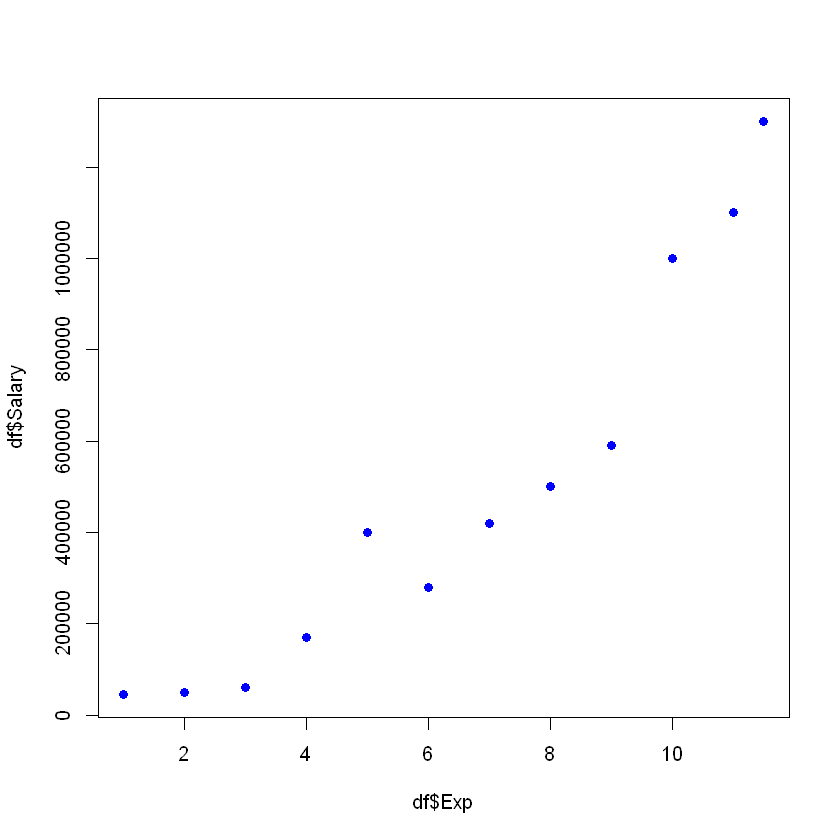

In [19]:
df$Exp2 <- df$Exp^2

plot(df$Exp, df$Salary, pch=19, col="blue")

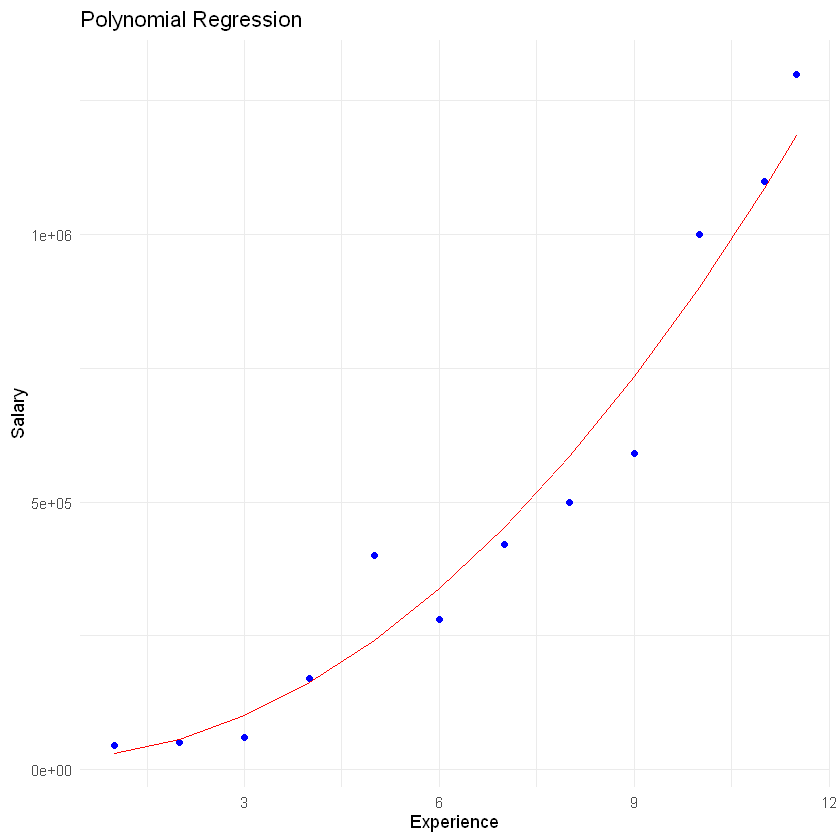

In [20]:
ggplot(df, aes(x = df$Exp, y = df$Salary)) +
  geom_point(color = 'blue') +
  geom_line(aes(y = predict(model, newdata=df)), color = 'red') +
  labs(x = "Experience", y = "Salary", title = "Polynomial Regression") +
  theme_minimal()